In [55]:
import sys
sys.path.append('./lib')
import matplotlib.pylab as pl
import numpy as np
import ot
from scipy.linalg import sqrtm
from PPMM_func import projOtm
import time


r = np.random.RandomState(42)

def im2mat(img):
    return img.reshape((img.shape[0] * img.shape[1], img.shape[2]))

def mat2im(X, shape):
    return X.reshape(shape)

def minmax(img):
    return np.clip(img, 0, 1)


In [56]:
I2 = pl.imread('picture/ocean_day.jpg').astype(np.float64) / 256
I1 = pl.imread('picture/ocean_sunset.jpg').astype(np.float64) / 256

# I1 = pl.imread('picture/s1.bmp').astype(np.float64) / 256
# I2 = pl.imread('picture/t1.bmp').astype(np.float64) / 256

# I1 = pl.imread('picture/s3.bmp').astype(np.float64) / 256
# I2 = pl.imread('picture/t3.bmp').astype(np.float64) / 256

X1 = im2mat(I1)
X2 = im2mat(I2)
ori_dat = X1
des_dat = X2

N = ori_dat.shape[0]
a, b = np.ones((N,)) / N, np.ones((N,)) / N

In [57]:
# training samples
nb = 1000
idx1 = r.randint(ori_dat.shape[0], size=(nb,))
idx2 = r.randint(des_dat.shape[0], size=(nb,))

Xs = ori_dat[idx1, :]
Xt = des_dat[idx2, :]


# EMDTransport
ot_emd = ot.da.EMDTransport()
ot_emd.fit(Xs=Xs, Xt=Xt)
transp_Xs_emd = ot_emd.transform(Xs=ori_dat)
Image_emd = minmax(mat2im(transp_Xs_emd, I1.shape))

# SinkhornTransport(reg = 0.1)
ot_sinkhorn = ot.da.SinkhornTransport(reg_e=1e-1)
ot_sinkhorn.fit(Xs=Xs, Xt=Xt)
transp_Xs_sinkhorn = ot_sinkhorn.transform(Xs=ori_dat)
Image_sinkhorn1 = minmax(mat2im(transp_Xs_sinkhorn, I1.shape))

# SinkhornTransport(reg = 0.01)
ot_sinkhorn = ot.da.SinkhornTransport(reg_e=1e-2)
ot_sinkhorn.fit(Xs=Xs, Xt=Xt)
transp_Xs_sinkhorn = ot_sinkhorn.transform(Xs=ori_dat)
Image_sinkhorn2 = minmax(mat2im(transp_Xs_sinkhorn, I1.shape))

In [58]:
ITR = 100

##PPMM SAVE
itr_data = ori_dat
for i in range(ITR):
    itr_data = projOtm(itr_data, des_dat, a, b, method = "SAVE")
    
Image_save = minmax(mat2im(itr_data, I1.shape))


##PPMM DR
itr_data = ori_dat
for i in range(ITR):
    itr_data = projOtm(itr_data, des_dat, a, b, method = "DR")

Image_dr = minmax(mat2im(itr_data, I1.shape))


##RANDOM
itr_data = ori_dat
for i in range(ITR):
    itr_data = projOtm(itr_data, des_dat, a, b, method = "RANDOM")

Image_random = minmax(mat2im(itr_data, I1.shape))


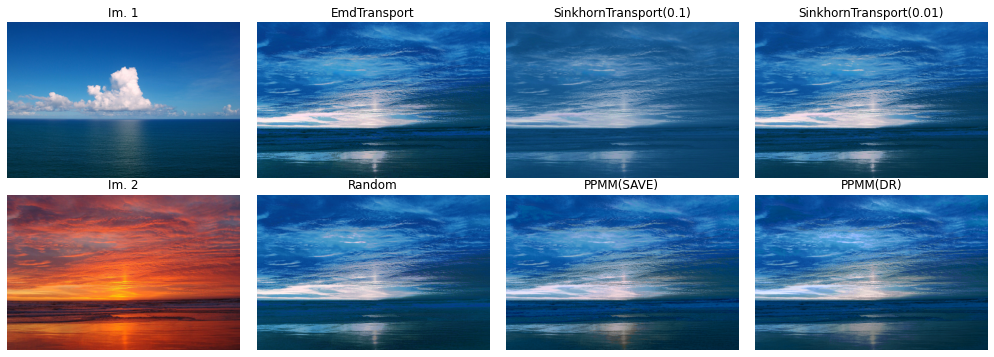

In [49]:
pl.figure(2, figsize=(14, 5))

pl.subplot(2, 4, 1)
pl.imshow(I2)
pl.axis('off')
pl.title('Im. 1')

pl.subplot(2, 4, 5)
pl.imshow(I1)
pl.axis('off')
pl.title('Im. 2')

pl.subplot(2, 4, 2)
pl.imshow(Image_emd)
pl.axis('off')
pl.title('EmdTransport')

pl.subplot(2, 4, 3)
pl.imshow(Image_sinkhorn1)
pl.axis('off')
pl.title('SinkhornTransport(0.1)')

pl.subplot(2, 4, 4)
pl.imshow(Image_sinkhorn2)
pl.axis('off')
pl.title('SinkhornTransport(0.01)')

pl.subplot(2, 4, 6)
pl.imshow(Image_random)
pl.axis('off')
pl.title('Random')

pl.subplot(2, 4, 7)
pl.imshow(Image_save)
pl.axis('off')
pl.title('PPMM(SAVE)')

pl.subplot(2, 4, 8)
pl.imshow(Image_dr)
pl.axis('off')
pl.title('PPMM(DR)')
pl.tight_layout()

pl.show()

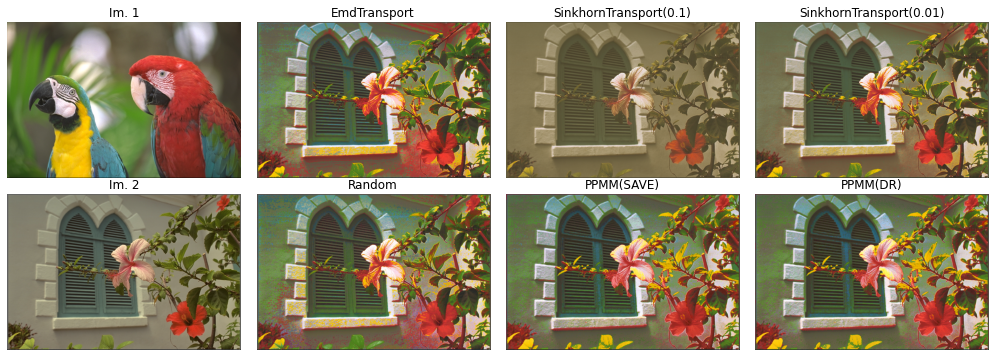

In [54]:
# I1 = pl.imread('picture/s1.bmp').astype(np.float64) / 256
# I2 = pl.imread('picture/t1.bmp').astype(np.float64) / 256

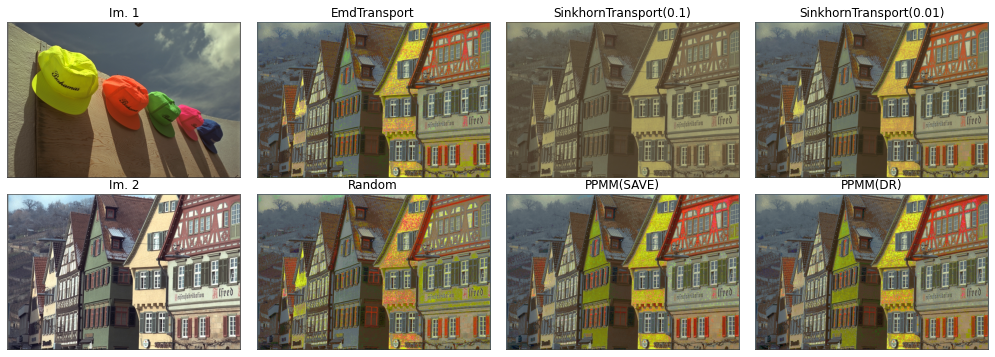

In [59]:
# I1 = pl.imread('picture/s3.bmp').astype(np.float64) / 256
# I2 = pl.imread('picture/t3.bmp').astype(np.float64) / 256